**Projet interpormo 2022**

**Groupe 5 : Génération de nouvelles observations**

**Travail préparatoire : Data Generation**

This notebook aims to show you examples of data generation, using the [Copulas](https://sdv.dev/Copulas) and [SDV](https://sdv.dev/SDV) libraries, two open source projects of the [Synthetic Data Vault Project](https://github.com/sdv-dev) . 

# Univariate

In [1]:
from copulas.univariate import TruncatedGaussian
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

The copula library offers a variety of distributions for modeling univariate data such as : 

* Beta
* Gamma
* Gaussian
* Gaussian KDE
* Log-Laplace
* Student T
* Truncated Gaussian
* Uniform

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
beta = TruncatedGaussian()
data = df[df.Age.isnull()==False]['Age']
beta.fit(data)

In [4]:
new_data = beta.sample(890)

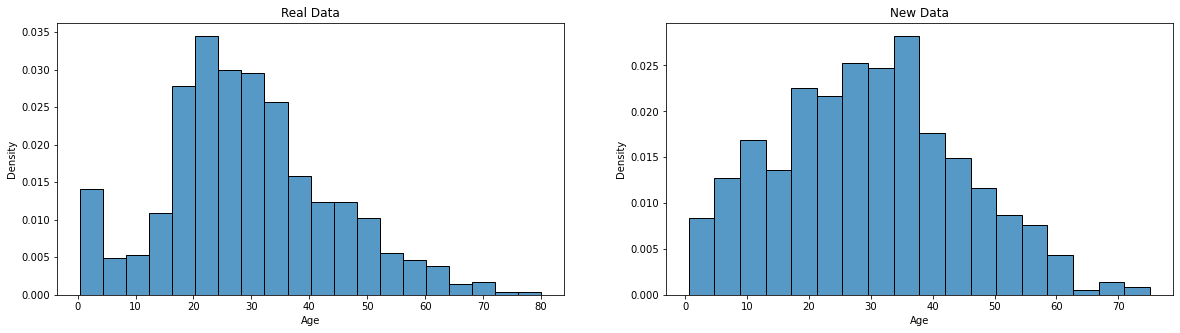

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sb.histplot( x=data,ax=axes[0],stat='density').set(title = 'Real Data', xlabel = 'Age')
sb.histplot( x=new_data,ax=axes[1],stat='density' ).set(title = 'New Data',xlabel = 'Age')
plt.show()

# Multivariate

In [6]:
from sdv.tabular import GaussianCopula
import warnings
warnings.filterwarnings("ignore")

In [7]:
model=GaussianCopula()
model.fit(df)

In [8]:
new_data=model.sample(890)

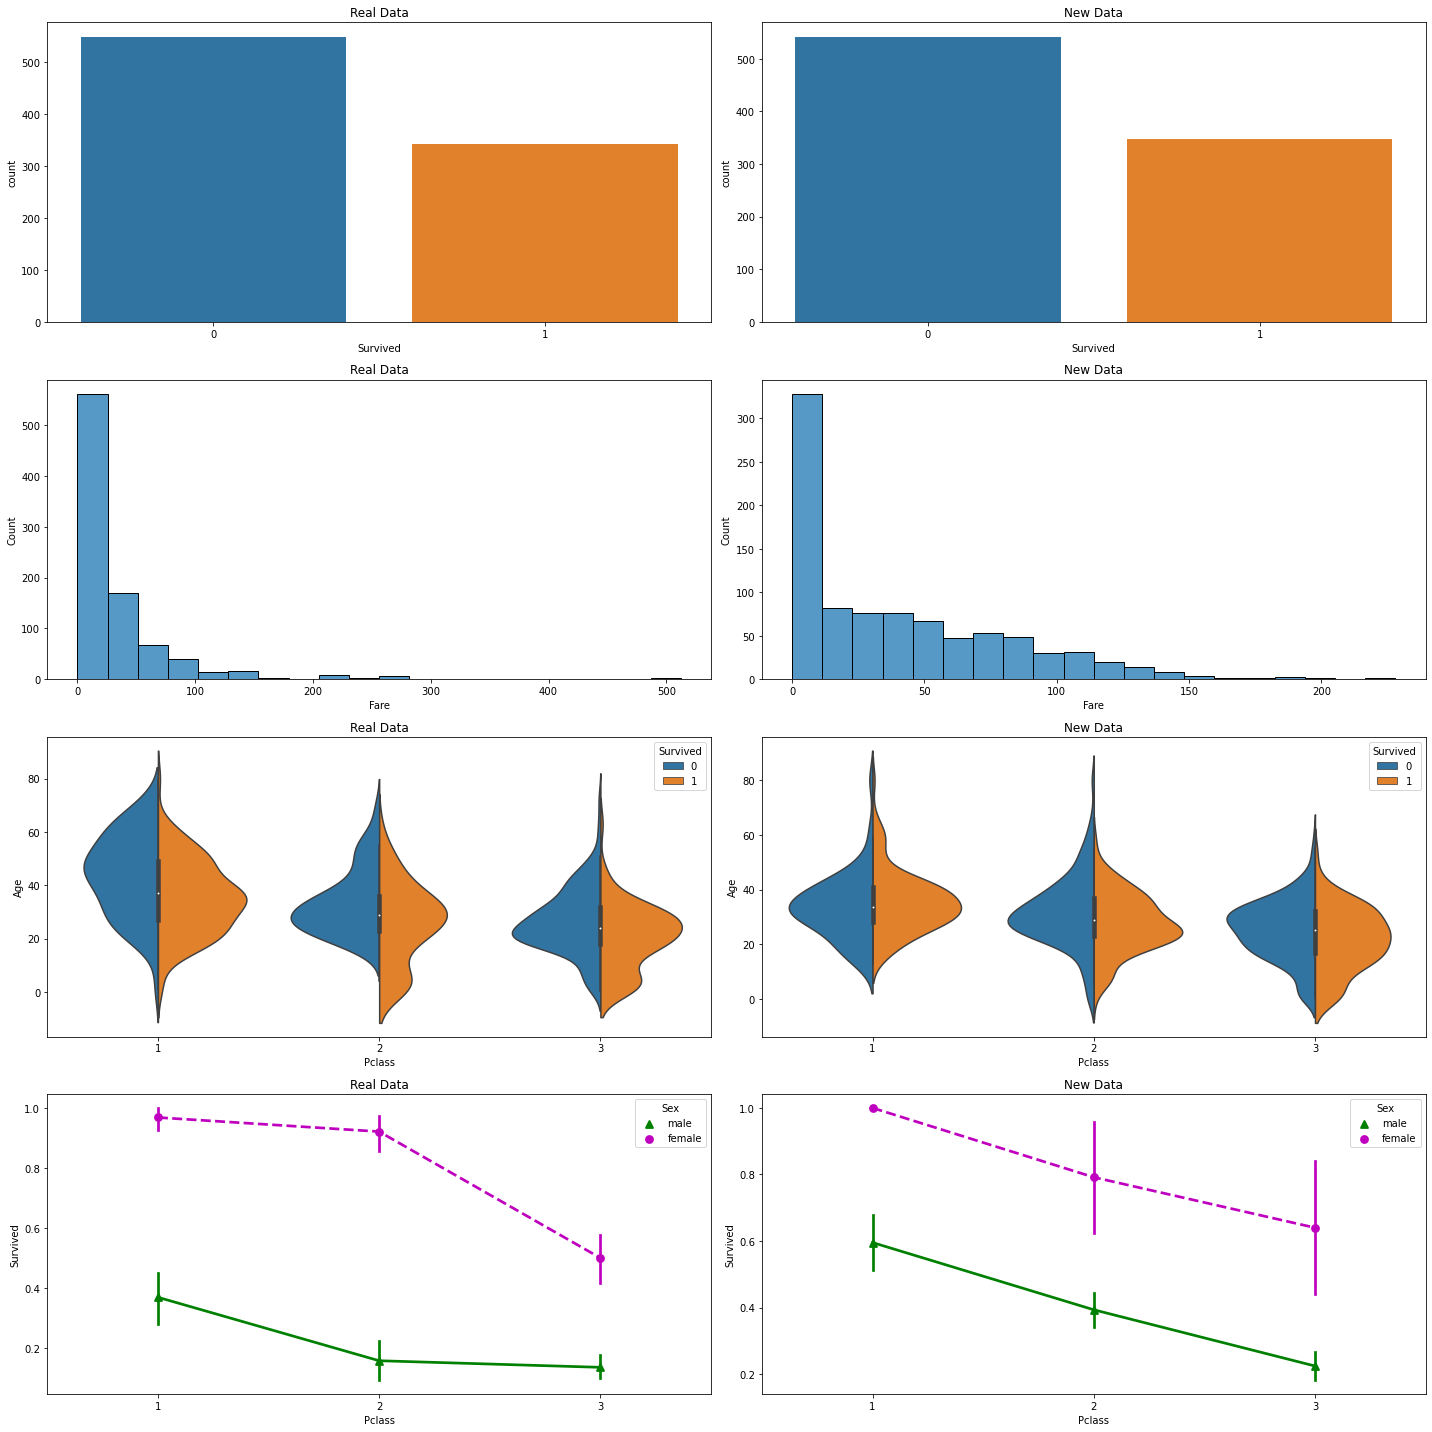

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
sb.countplot(x='Survived',data=df,ax=axes[0,0]).set(title = 'Real Data')
sb.countplot(x='Survived',data=new_data,ax=axes[0,1]).set(title = 'New Data')
sb.histplot(x='Fare',bins=20,data=df,ax=axes[1,0]).set(title = 'Real Data')
sb.histplot(x='Fare',bins=20,data=new_data,ax=axes[1,1]).set(title = 'New Data')
sb.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split = True,ax=axes[2,0]).set(title = 'Real Data')
sb.violinplot(data=new_data, x='Pclass', y='Age', hue='Survived', split = True,ax=axes[2,1]).set(title = 'New Data')
sb.pointplot(x="Pclass", y="Survived", hue="Sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"], data=df,ax=axes[3,0]).set(title = 'Real Data')
sb.pointplot(x="Pclass", y="Survived", hue="Sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"], data=new_data,ax=axes[3,1]).set(title = 'New Data')
plt.tight_layout()

# GAN

In [10]:
from sdv.tabular import CTGAN

In [11]:
model = CTGAN(verbose=True,
              epochs=200,
              batch_size=100,
              generator_dim=(256, 256, 256),
              discriminator_dim=(256, 256, 256))
model.fit(df)

Epoch 1, Loss G:  3.4744, Loss D: -0.0443
Epoch 2, Loss G:  3.0905, Loss D: -0.0977
Epoch 3, Loss G:  2.9898, Loss D: -0.1272
Epoch 4, Loss G:  3.3770, Loss D: -0.0712
Epoch 5, Loss G:  3.3681, Loss D: -0.2304
Epoch 6, Loss G:  2.9728, Loss D: -0.2181
Epoch 7, Loss G:  3.8955, Loss D: -0.0726
Epoch 8, Loss G:  2.6290, Loss D: -0.2455
Epoch 9, Loss G:  3.0122, Loss D: -0.1459
Epoch 10, Loss G:  2.6390, Loss D: -0.0475
Epoch 11, Loss G:  2.7498, Loss D: -0.0979
Epoch 12, Loss G:  2.9741, Loss D: -0.1133
Epoch 13, Loss G:  2.2132, Loss D:  0.1967
Epoch 14, Loss G:  2.2828, Loss D:  0.1126
Epoch 15, Loss G:  3.1702, Loss D: -0.1286
Epoch 16, Loss G:  3.3061, Loss D:  0.1242
Epoch 17, Loss G:  2.4859, Loss D:  0.2614
Epoch 18, Loss G:  2.2499, Loss D: -0.0124
Epoch 19, Loss G:  2.5149, Loss D: -0.0361
Epoch 20, Loss G:  2.3088, Loss D:  0.1503
Epoch 21, Loss G:  2.2365, Loss D:  0.1571
Epoch 22, Loss G:  3.2668, Loss D: -0.2062
Epoch 23, Loss G:  2.6939, Loss D: -0.0573
Epoch 24, Loss G:  1

In [12]:
new_data = model.sample(890)

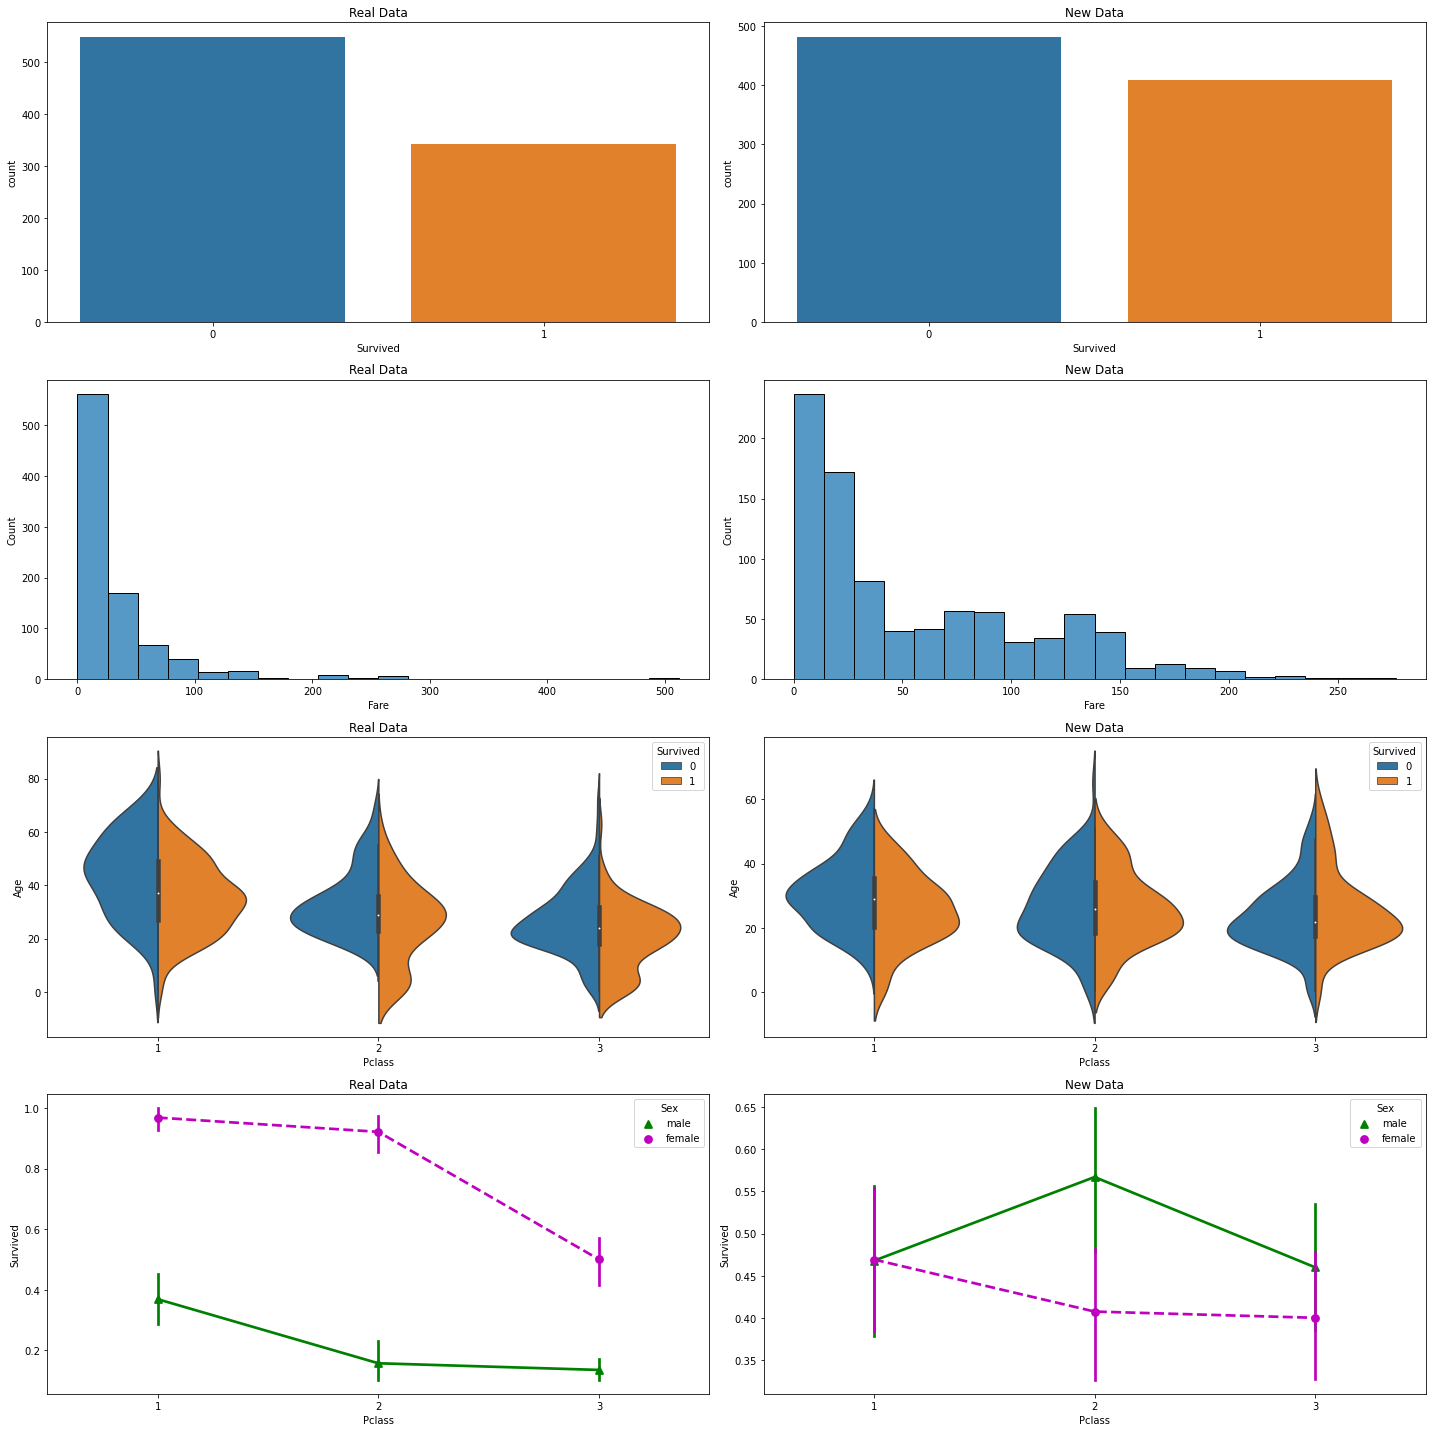

In [13]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
sb.countplot(x='Survived',data=df,ax=axes[0,0]).set(title = 'Real Data')
sb.countplot(x='Survived',data=new_data,ax=axes[0,1]).set(title = 'New Data')
sb.histplot(x='Fare',bins=20,data=df,ax=axes[1,0]).set(title = 'Real Data')
sb.histplot(x='Fare',bins=20,data=new_data,ax=axes[1,1]).set(title = 'New Data')
sb.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split = True,ax=axes[2,0]).set(title = 'Real Data')
sb.violinplot(data=new_data, x='Pclass', y='Age', hue='Survived', split = True,ax=axes[2,1]).set(title = 'New Data')
sb.pointplot(x="Pclass", y="Survived", hue="Sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"], data=df,ax=axes[3,0]).set(title = 'Real Data')
sb.pointplot(x="Pclass", y="Survived", hue="Sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"], data=new_data,ax=axes[3,1]).set(title = 'New Data')
plt.tight_layout()

 These examples are not optimized, I let you read the documentation for these libraries to know the different methods.There are also different metrics that are proposed to evaluate the relevance of our generated data. 

Moreover, this is a simple example of data generation with a python library, we will not necessarily use this one.  